In [12]:
# Import packages
import matplotlib.pyplot as plt
from collections import Counter
import re

In [24]:
# Open log file
with open("../logs/interactions.log") as f:
    lines = f.readlines()

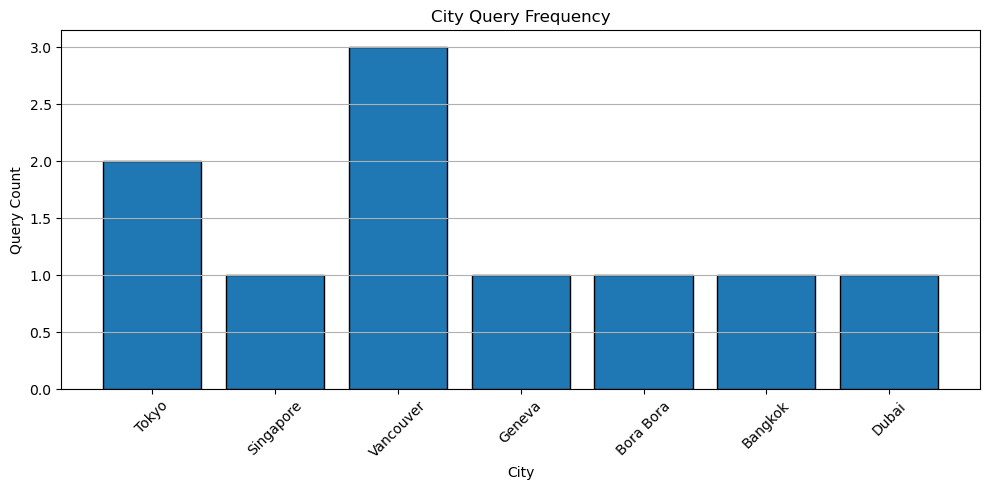

In [25]:
# Plot frequency chart of cities
cities = [line.split("CITY: ")[-1].strip() for line in lines if "CITY: " in line]

city_counts = Counter(cities)
labels = list(city_counts.keys())
values = list(city_counts.values())
x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, values, edgecolor='black')
plt.title("City Query Frequency")
plt.xlabel("City")
plt.ylabel("Query Count")
plt.xticks(x, labels, rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [26]:
# Keep track of failed calls
with open("../logs/interactions.log", 'r') as f:
    log_data = f.read()

error = len(re.findall(r'ERROR:pipeline.retry_handler:Function failed despite retries.', log_data))
success = len(re.findall(r'RESPONSE:', log_data))
total_count = error + success

print(f"Total calls: {total_count}, Successes: {success}, Errors: {error}")


Total calls: 16, Successes: 10, Errors: 6


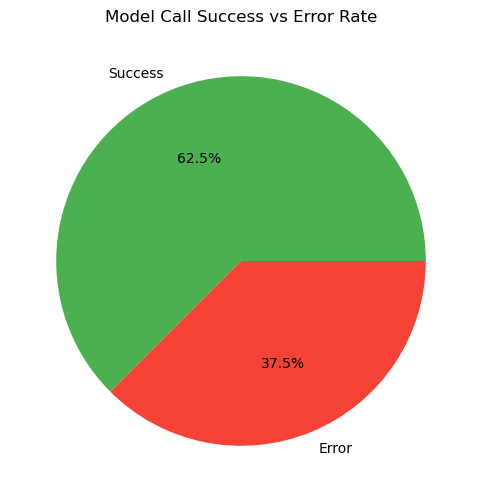

In [27]:
# Visualize error data
labels = ['Success', 'Error']
sizes = [success, error]
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Model Call Success vs Error Rate')
plt.show()